<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#8.1-层次化索引" data-toc-modified-id="8.1-层次化索引-1">8.1 层次化索引</a></span></li><li><span><a href="#8.2-合并数据集" data-toc-modified-id="8.2-合并数据集-2">8.2 合并数据集</a></span><ul class="toc-item"><li><span><a href="#8.2.1-数据库风格的DataFrame合并" data-toc-modified-id="8.2.1-数据库风格的DataFrame合并-2.1">8.2.1 数据库风格的DataFrame合并</a></span></li><li><span><a href="#8.2.2-索引上的合并" data-toc-modified-id="8.2.2-索引上的合并-2.2">8.2.2 索引上的合并</a></span></li><li><span><a href="#8.2.3-轴向连接" data-toc-modified-id="8.2.3-轴向连接-2.3">8.2.3 轴向连接</a></span></li><li><span><a href="#8.2.4-合并重叠数据" data-toc-modified-id="8.2.4-合并重叠数据-2.4">8.2.4 合并重叠数据</a></span></li></ul></li><li><span><a href="#8.3-重塑和轴向旋转" data-toc-modified-id="8.3-重塑和轴向旋转-3">8.3 重塑和轴向旋转</a></span><ul class="toc-item"><li><span><a href="#8.3.1-重塑层次化索引" data-toc-modified-id="8.3.1-重塑层次化索引-3.1">8.3.1 重塑层次化索引</a></span></li><li><span><a href="#8.3.2-将“长格式”旋转为“宽格式”" data-toc-modified-id="8.3.2-将“长格式”旋转为“宽格式”-3.2">8.3.2 将“长格式”旋转为“宽格式”</a></span></li><li><span><a href="#8.3.3-将“宽格式”旋转为“长格式”" data-toc-modified-id="8.3.3-将“宽格式”旋转为“长格式”-3.3">8.3.3 将“宽格式”旋转为“长格式”</a></span></li></ul></li><li><span><a href="#8.4-总结" data-toc-modified-id="8.4-总结-4">8.4 总结</a></span></li></ul></div>

# 第 8 章 数据规整：聚合、合并和重塑

## 8.1 层次化索引

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.Series(np.random.randn(9),
   ...:                  index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
   ...:                         [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [6]:
data

a  1   -0.414357
   2    2.126188
   3   -0.416003
b  1    0.659523
   3    0.283122
c  1    1.101369
   2   -0.630761
d  2   -0.145377
   3   -0.363843
dtype: float64

In [7]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [8]:
data.unstack()

,1,2,3
a,-0.414357,2.126188,-0.416003
b,0.659523,NaN,0.283122
c,1.101369,-0.630761,NaN
d,NaN,-0.145377,-0.363843


In [9]:
data.unstack().stack()

a  1   -0.414357
   2    2.126188
   3   -0.416003
b  1    0.659523
   3    0.283122
c  1    1.101369
   2   -0.630761
d  2   -0.145377
   3   -0.363843
dtype: float64

In [10]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
   ....:                      index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
   ....:                      columns=[['Ohio', 'Ohio', 'Colorado'],
   ....:                               ['Green', 'Red', 'Green']])

In [11]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [12]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

## 8.2 合并数据集

pandas对象中的数据可以通过一些方式进行合并：

- pandas.merge可根据一个或多个键将不同DataFrame中的行连接起来。SQL或其他关系型数据库的用户对此应该会比较熟悉，因为它实现的就是数据库的join操作。  

- pandas.concat可以沿着一条轴将多个对象堆叠到一起。  

- 实例方法combine_first可以将重复数据拼接在一起，用一个对象中的值填充另一个对象中的缺失值。 

我将分别对它们进行讲解，并给出一些例子。本书剩余部分的示例中将经常用到它们。

### 8.2.1 数据库风格的DataFrame合并

In [13]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
   ....:                     'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
   ....:                     'data2': range(3)})

In [14]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [15]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [16]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [17]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


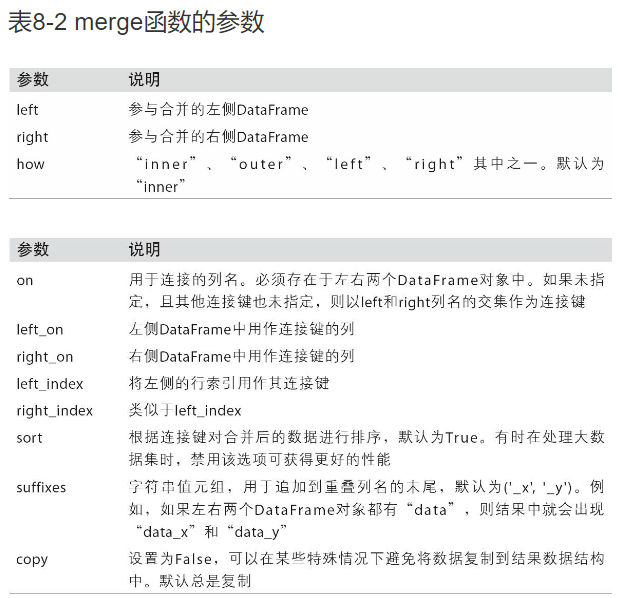

### 8.2.2 索引上的合并

In [18]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
   ....:                       'value': range(6)})

In [19]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [20]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [21]:
right1

,group_val
a,3.5
b,7.0


In [22]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [23]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


### 8.2.3 轴向连接

In [24]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [26]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s1

a    0
b    1
dtype: int64

In [27]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s2

c    2
d    3
e    4
dtype: int64

In [28]:
s3 = pd.Series([5, 6], index=['f', 'g'])
s3

f    5
g    6
dtype: int64

In [29]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

默认情况下，concat是在axis=0上工作的，最终产生一个新的Series。如果传入axis=1，则结果就会变成一个DataFrame（axis=1是列）：

In [30]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [32]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [33]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [34]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


在这个例子中，f和g标签消失了，是因为使用的是join='inner'选项。

你可以通过join_axes指定要在其它轴上使用的索引：

In [36]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

TypeError: concat() got an unexpected keyword argument 'join_axes'

### 8.2.4 合并重叠数据

还有一种数据组合问题不能用简单的合并（merge）或连接（concatenation）运算来处理。比如说，你可能有索引全部或部分重叠的两个数据集。举个有启发性的例子，我们使用NumPy的where函数，它表示一种等价于面向数组的if-else：

In [38]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
   .....:               index=['f', 'e', 'd', 'c', 'b', 'a'])

In [39]:
b = pd.Series(np.arange(len(a), dtype=np.float64),
   .....:               index=['f', 'e', 'd', 'c', 'b', 'a'])

In [40]:
b[-1] = np.nan

In [41]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [42]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [43]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

Series有一个combine_first方法，实现的也是一样的功能，还带有pandas的数据对齐：

In [46]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

对于DataFrame，combine_first自然也会在列上做同样的事情，因此你可以将其看做：用传递对象中的数据为调用对象的缺失数据“打补丁”：

In [47]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
   .....:                     'b': [np.nan, 2., np.nan, 6.],
   .....:                     'c': range(2, 18, 4)})


In [48]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
   .....:                     'b': [np.nan, 3., 4., 6., 8.]})

In [49]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [50]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [51]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 8.3 重塑和轴向旋转

有许多用于重新排列表格型数据的基础运算。这些函数也称作重塑（reshape）或轴向旋转（pivot）运算。

### 8.3.1 重塑层次化索引

层次化索引为DataFrame数据的重排任务提供了一种具有良好一致性的方式。主要功能有二：
- stack：将数据的列“旋转”为行。
- unstack：将数据的行“旋转”为列。

In [52]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
   .....:                     index=pd.Index(['Ohio','Colorado'], name='state'),
   .....:                     columns=pd.Index(['one', 'two', 'three'],
   .....:                     name='number'))

In [53]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [54]:
result = data.stack()

In [55]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [56]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


默认情况下，unstack操作的是最内层（stack也是如此）。传入分层级别的编号或名称即可对其它级别进行unstack操作：

In [57]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [58]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


### 8.3.2 将“长格式”旋转为“宽格式”

多个时间序列数据通常是以所谓的“长格式”（long）或“堆叠格式”（stacked）存储在数据库和CSV中的。我们先加载一些示例数据，做一些时间序列规整和数据清洗：

### 8.3.3 将“宽格式”旋转为“长格式”

In [59]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
   .....:                    'A': [1, 2, 3],
   .....:                    'B': [4, 5, 6],
   .....:                    'C': [7, 8, 9]})


In [60]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [61]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [62]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [63]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [64]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


## 8.4 总结